kappa: 10
theta: 10
sigma: 114.14213562373095


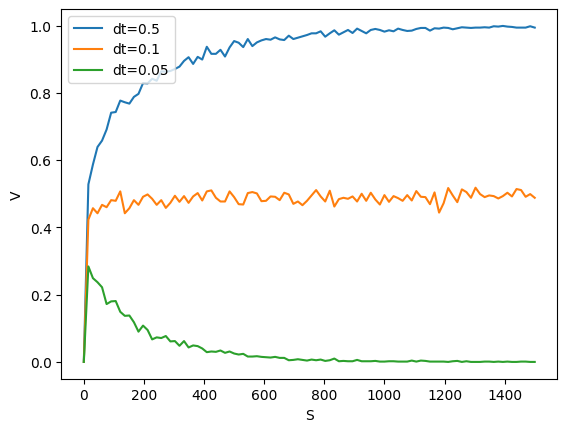

In [1]:
import numpy as np
import matplotlib.pyplot as plt

S = 1
# T = 5
m = 1
# dt = T/m
dt = 0.05
N = 1000
"""
ex1 task:
"""
kappa = 10
theta = 10
sigma = np.sqrt(2*kappa*theta)+100

# kappa = 100/dt
# theta = 1/(1e2*kappa)
# # 2*kappa*theta>sigma**2
# sigma = 0.5*np.sqrt(2)*np.sqrt(theta*kappa)

# kappa = 1.5/dt
# theta = 1/(1e5*kappa)
# sigma = 0.5*np.sqrt(2)*np.sqrt(theta*kappa)

print("kappa:", kappa)
print("theta:", theta)
print("sigma:", sigma)

def step(S, t, dWt):
    return S + a(t, S)*dt + b(t, S)*dWt

def a(t, S):
    return kappa*(theta-S)

def b(t, S):
    return sigma*np.sqrt(S)
    
def run(S, m):
    for i in range(m):
        S = step(S, i*dt, np.random.normal(0, dt))
    return S

def computeRange(Srange):
    data = []
    for S in Srange:
        c = 0
        ac = 0
        for _ in range(N):
            ac += 1
            if(run(S, m) < 0): c+= 1   
        data.append(c/ac)
    return data
    
if __name__ == "__main__":
    Srange = np.linspace(0,1500,100)
    dt = 0.5
    data1 = computeRange(Srange)
    dt = 0.1
    data2 = computeRange(Srange)
    dt = 0.05
    data3 = computeRange(Srange)
    
    plt.plot(Srange, data1, label="dt=0.5")
    plt.plot(Srange, data2, label="dt=0.1")
    plt.plot(Srange, data3, label="dt=0.05")

    plt.xlabel("S")
    plt.ylabel("V")
    plt.legend()
    plt.show()
 